In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
from statsmodels.datasets import get_rdataset

In [24]:
air = get_rdataset("AirPassengers").data["value"]

In [25]:
air

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

# AutoRegressive Integrated Moving Average(ARIMA)

### P, D, Q
*P(Autoregressive Term) : Represents the number of autoregressive term, which are lagged values of the dependent variables
*D(Difference term) : Represents the number of difference needed to make the time series stationary.
*Q(Moving Average Term) : Represents the number of lagged forecast errors in the prediction equation, which are lagged values of the forecast errors.

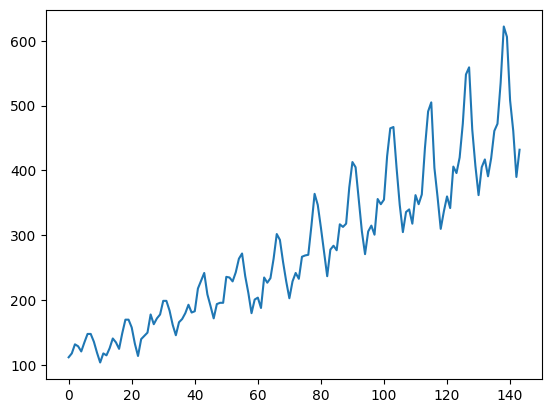

In [26]:
plt.plot(air)

In [27]:
best_order = None
best_aic = np.inf

In [28]:
for p in range(7, 15):
    for d in range(5):
        for q in range(7,15):
            try:
                model=ARIMA(air, order=(p,d,q))
                result= model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic()
                    best_order = (p,d,q)
            except:
                continue

In [29]:
best_aic

inf

In [30]:
best_order

In [31]:
model = ARIMA(air, order=(9,2,5))

In [32]:
forecast_steps = 24
forecast = result.get_forecast(steps = forecast_steps)

In [33]:
forecast

In [34]:
forecast.predicted_mean

144    469.112848
145    441.428256
146    465.540200
147    517.759822
148    548.738888
149    606.730711
150    738.078867
151    721.760363
152    642.553718
153    600.016041
154    533.607525
155    578.420733
156    617.904684
157    587.084243
158    611.934410
159    671.069135
160    705.511166
161    771.366729
162    904.135412
163    884.919303
164    821.922847
165    777.155225
166    727.109881
167    779.985987
Name: predicted_mean, dtype: float64

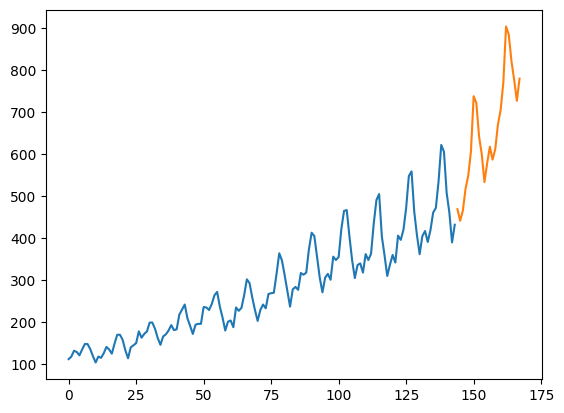

In [35]:
plt.plot(air)
plt.plot(np.arange(len(air), len(air) + forecast_steps), forecast.predicted_mean)